# BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.
# Business Use Case
There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

Project Description
Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.
About The Dataset
The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 



# You are provided with following 2 files:
1.     train.csv : Use this dataset to train the model. This file contains all the client and call details as well as the target variable “subscribed”. You have to train your model using this file.
2.     test.csv : Use the trained model to predict whether a new set of clients will subscribe the term deposit.
 
Dataset Attributes
Here is the description of all the variables:
•	Variable: Definition
•	ID: Unique client ID
•	age: Age of the client
•	job: Type of job
•	marital: Marital status of the client
•	education: Education level
•	default: Credit in default.
•	housing: Housing loan
•	loan: Personal loan
•	contact: Type of communication
•	month: Contact month
•	day_of_week: Day of week of contact
•	duration: Contact duration
•	campaign: number of contacts performed during this campaign to the client
•	pdays: number of days that passed by after the client was last contacted
•	previous: number of contacts performed before this campaign
•	poutcome: outcome of the previous marketing campaign
Output variable (desired target):
•	Subscribed (target): has the client subscribed a term deposit? (YES/NO)



Dataset Link-
•	https://github.com/FlipRoboTechnologies/ML-Datasets/tree/main/Bank%20Marketing
•	https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Bank%20Marketing/termdeposit_test.csv
•	https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import  confusion_matrix,classification_report,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:

dftrain= pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv')


In [3]:
dftest= pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_test.csv')

In [4]:
dftrain.head(10)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
5,29390,33,management,single,tertiary,no,0,yes,no,cellular,2,feb,116,3,-1,0,unknown,no
6,40444,56,retired,married,secondary,no,1044,no,no,telephone,3,jul,353,2,-1,0,unknown,yes
7,40194,50,technician,single,secondary,no,1811,no,no,cellular,8,jun,97,4,-1,0,unknown,no
8,29824,45,blue-collar,divorced,secondary,no,1951,yes,no,cellular,4,feb,692,1,-1,0,unknown,no
9,44676,35,admin.,married,secondary,no,1204,no,no,cellular,3,sep,789,2,-1,0,unknown,no


In [5]:
dftest.head(10)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
5,16013,32,management,single,tertiary,no,0,yes,no,cellular,22,jul,455,2,-1,0,unknown
6,196,33,blue-collar,single,secondary,no,307,yes,no,unknown,5,may,309,2,-1,0,unknown
7,8516,37,management,married,secondary,no,341,no,no,unknown,3,jun,120,2,-1,0,unknown
8,31208,36,technician,divorced,tertiary,no,1381,no,no,cellular,2,mar,149,1,-1,0,unknown
9,38462,50,admin.,single,primary,no,181,yes,no,cellular,15,may,119,4,372,3,failure


In [6]:
dftest.shape

(13564, 17)

In [7]:
dftrain.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [8]:
dftrain.shape

(31647, 18)

In [9]:
dftrain.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [10]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [11]:
for col  in dftrain.select_dtypes(include='object').columns:
    print(col)
    print(dftrain[col].unique())

job
['admin.' 'unknown' 'services' 'management' 'technician' 'retired'
 'blue-collar' 'housemaid' 'self-employed' 'student' 'entrepreneur'
 'unemployed']
marital
['married' 'divorced' 'single']
education
['unknown' 'secondary' 'tertiary' 'primary']
default
['no' 'yes']
housing
['no' 'yes']
loan
['no' 'yes']
contact
['telephone' 'cellular' 'unknown']
month
['nov' 'jul' 'jun' 'feb' 'sep' 'jan' 'may' 'aug' 'apr' 'oct' 'mar' 'dec']
poutcome
['unknown' 'success' 'failure' 'other']
subscribed
['no' 'yes']


# finding categorical feature distribution

In [12]:
categorical_features = [feature for feature in dftrain.columns if dftrain[feature].dtype == 'object' and feature != 'subscribed']
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

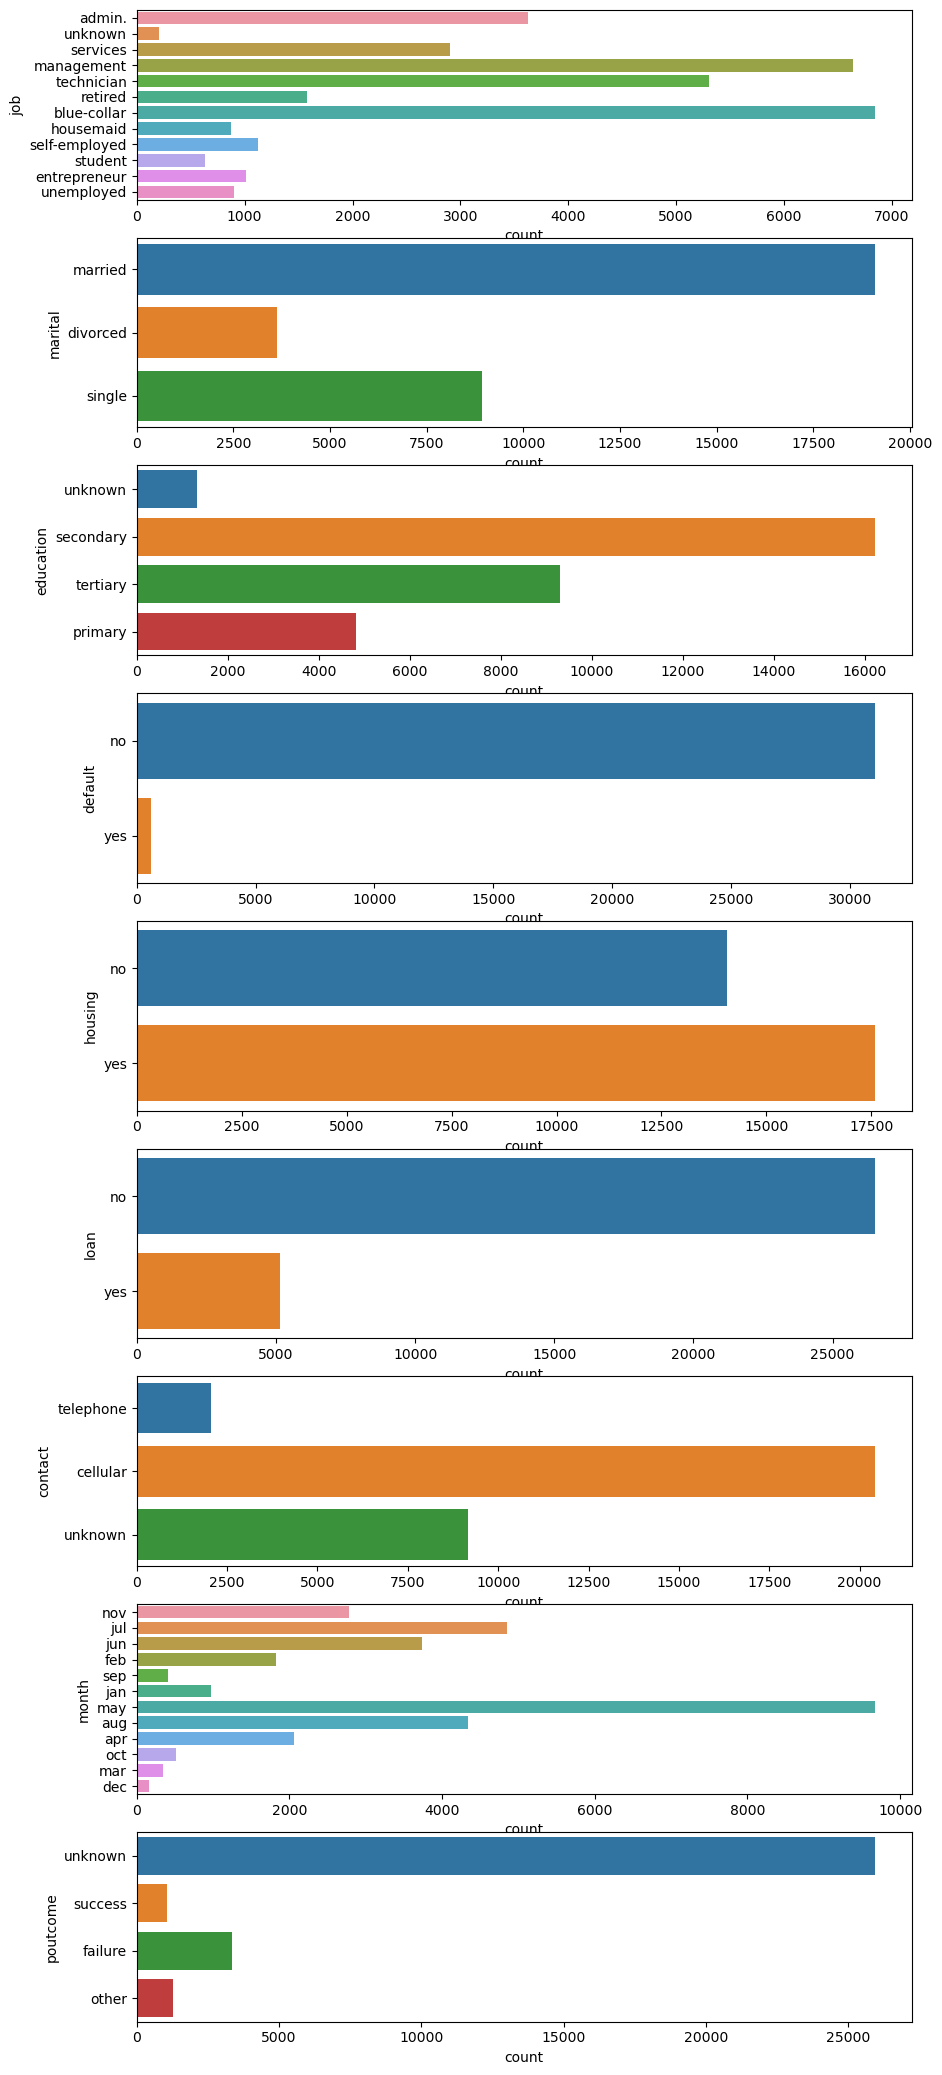

In [13]:

# lets check the relationship of of all the feature with label 
plt.figure(figsize=(10,35),facecolor='w')
plotnumber=1
for categorical_features in categorical_features:
    if plotnumber<=12:
    # as there is 9 column in the data
        ax=plt.subplot(12,1,plotnumber)
        sns.countplot(y=categorical_features,data=dftrain)
    plotnumber+=1
plt.show()    

# lets check the outlier present or not

ID             Axes(0.125,0.653529;0.227941x0.226471)
age         Axes(0.398529,0.653529;0.227941x0.226471)
balance     Axes(0.672059,0.653529;0.227941x0.226471)
day            Axes(0.125,0.381765;0.227941x0.226471)
duration    Axes(0.398529,0.381765;0.227941x0.226471)
campaign    Axes(0.672059,0.381765;0.227941x0.226471)
pdays              Axes(0.125,0.11;0.227941x0.226471)
previous        Axes(0.398529,0.11;0.227941x0.226471)
dtype: object

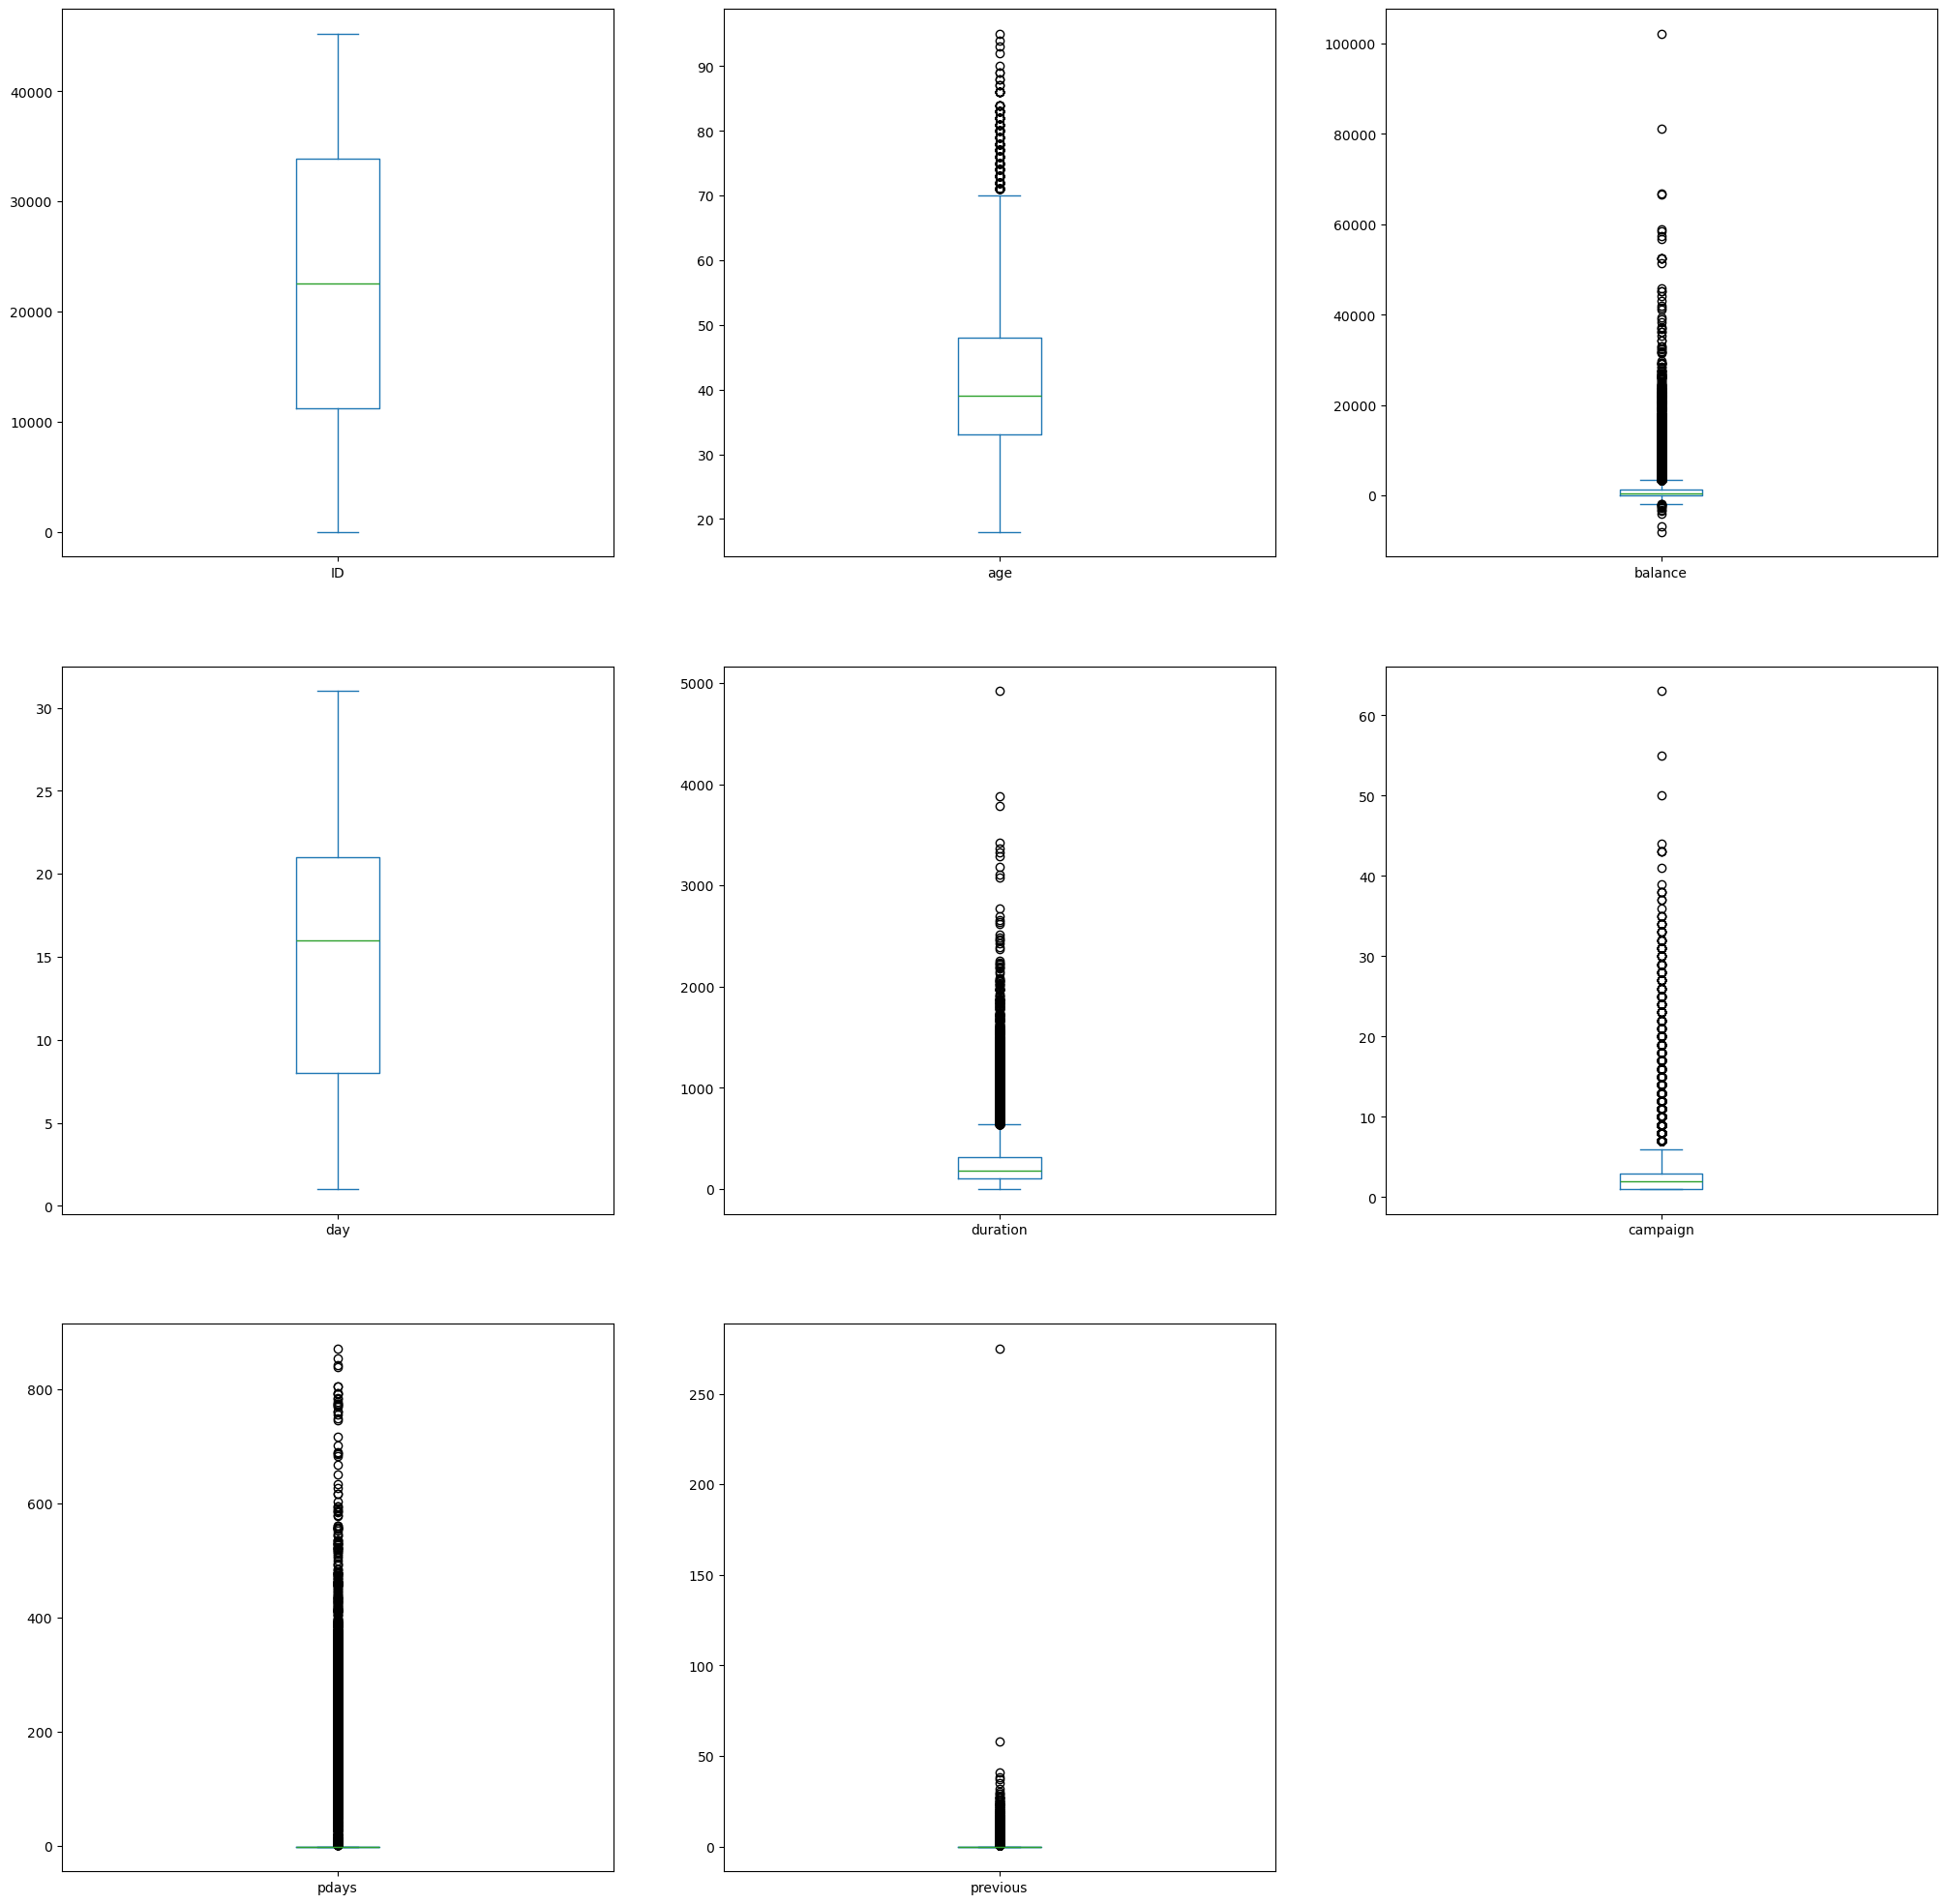

In [14]:
dftrain.plot(kind='box',subplots=True,layout=(3,3),figsize=(25,25),sharex=False)

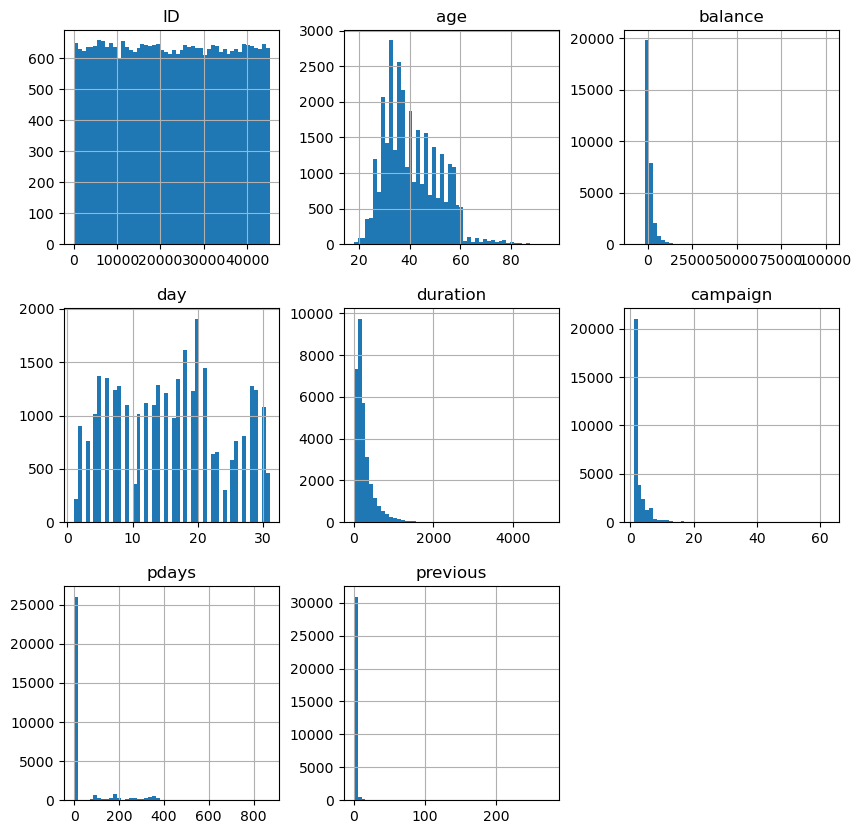

In [15]:
dftrain.hist(figsize=(10,10),bins=50)
plt.show()

# let check the diatribution of continous numerical features

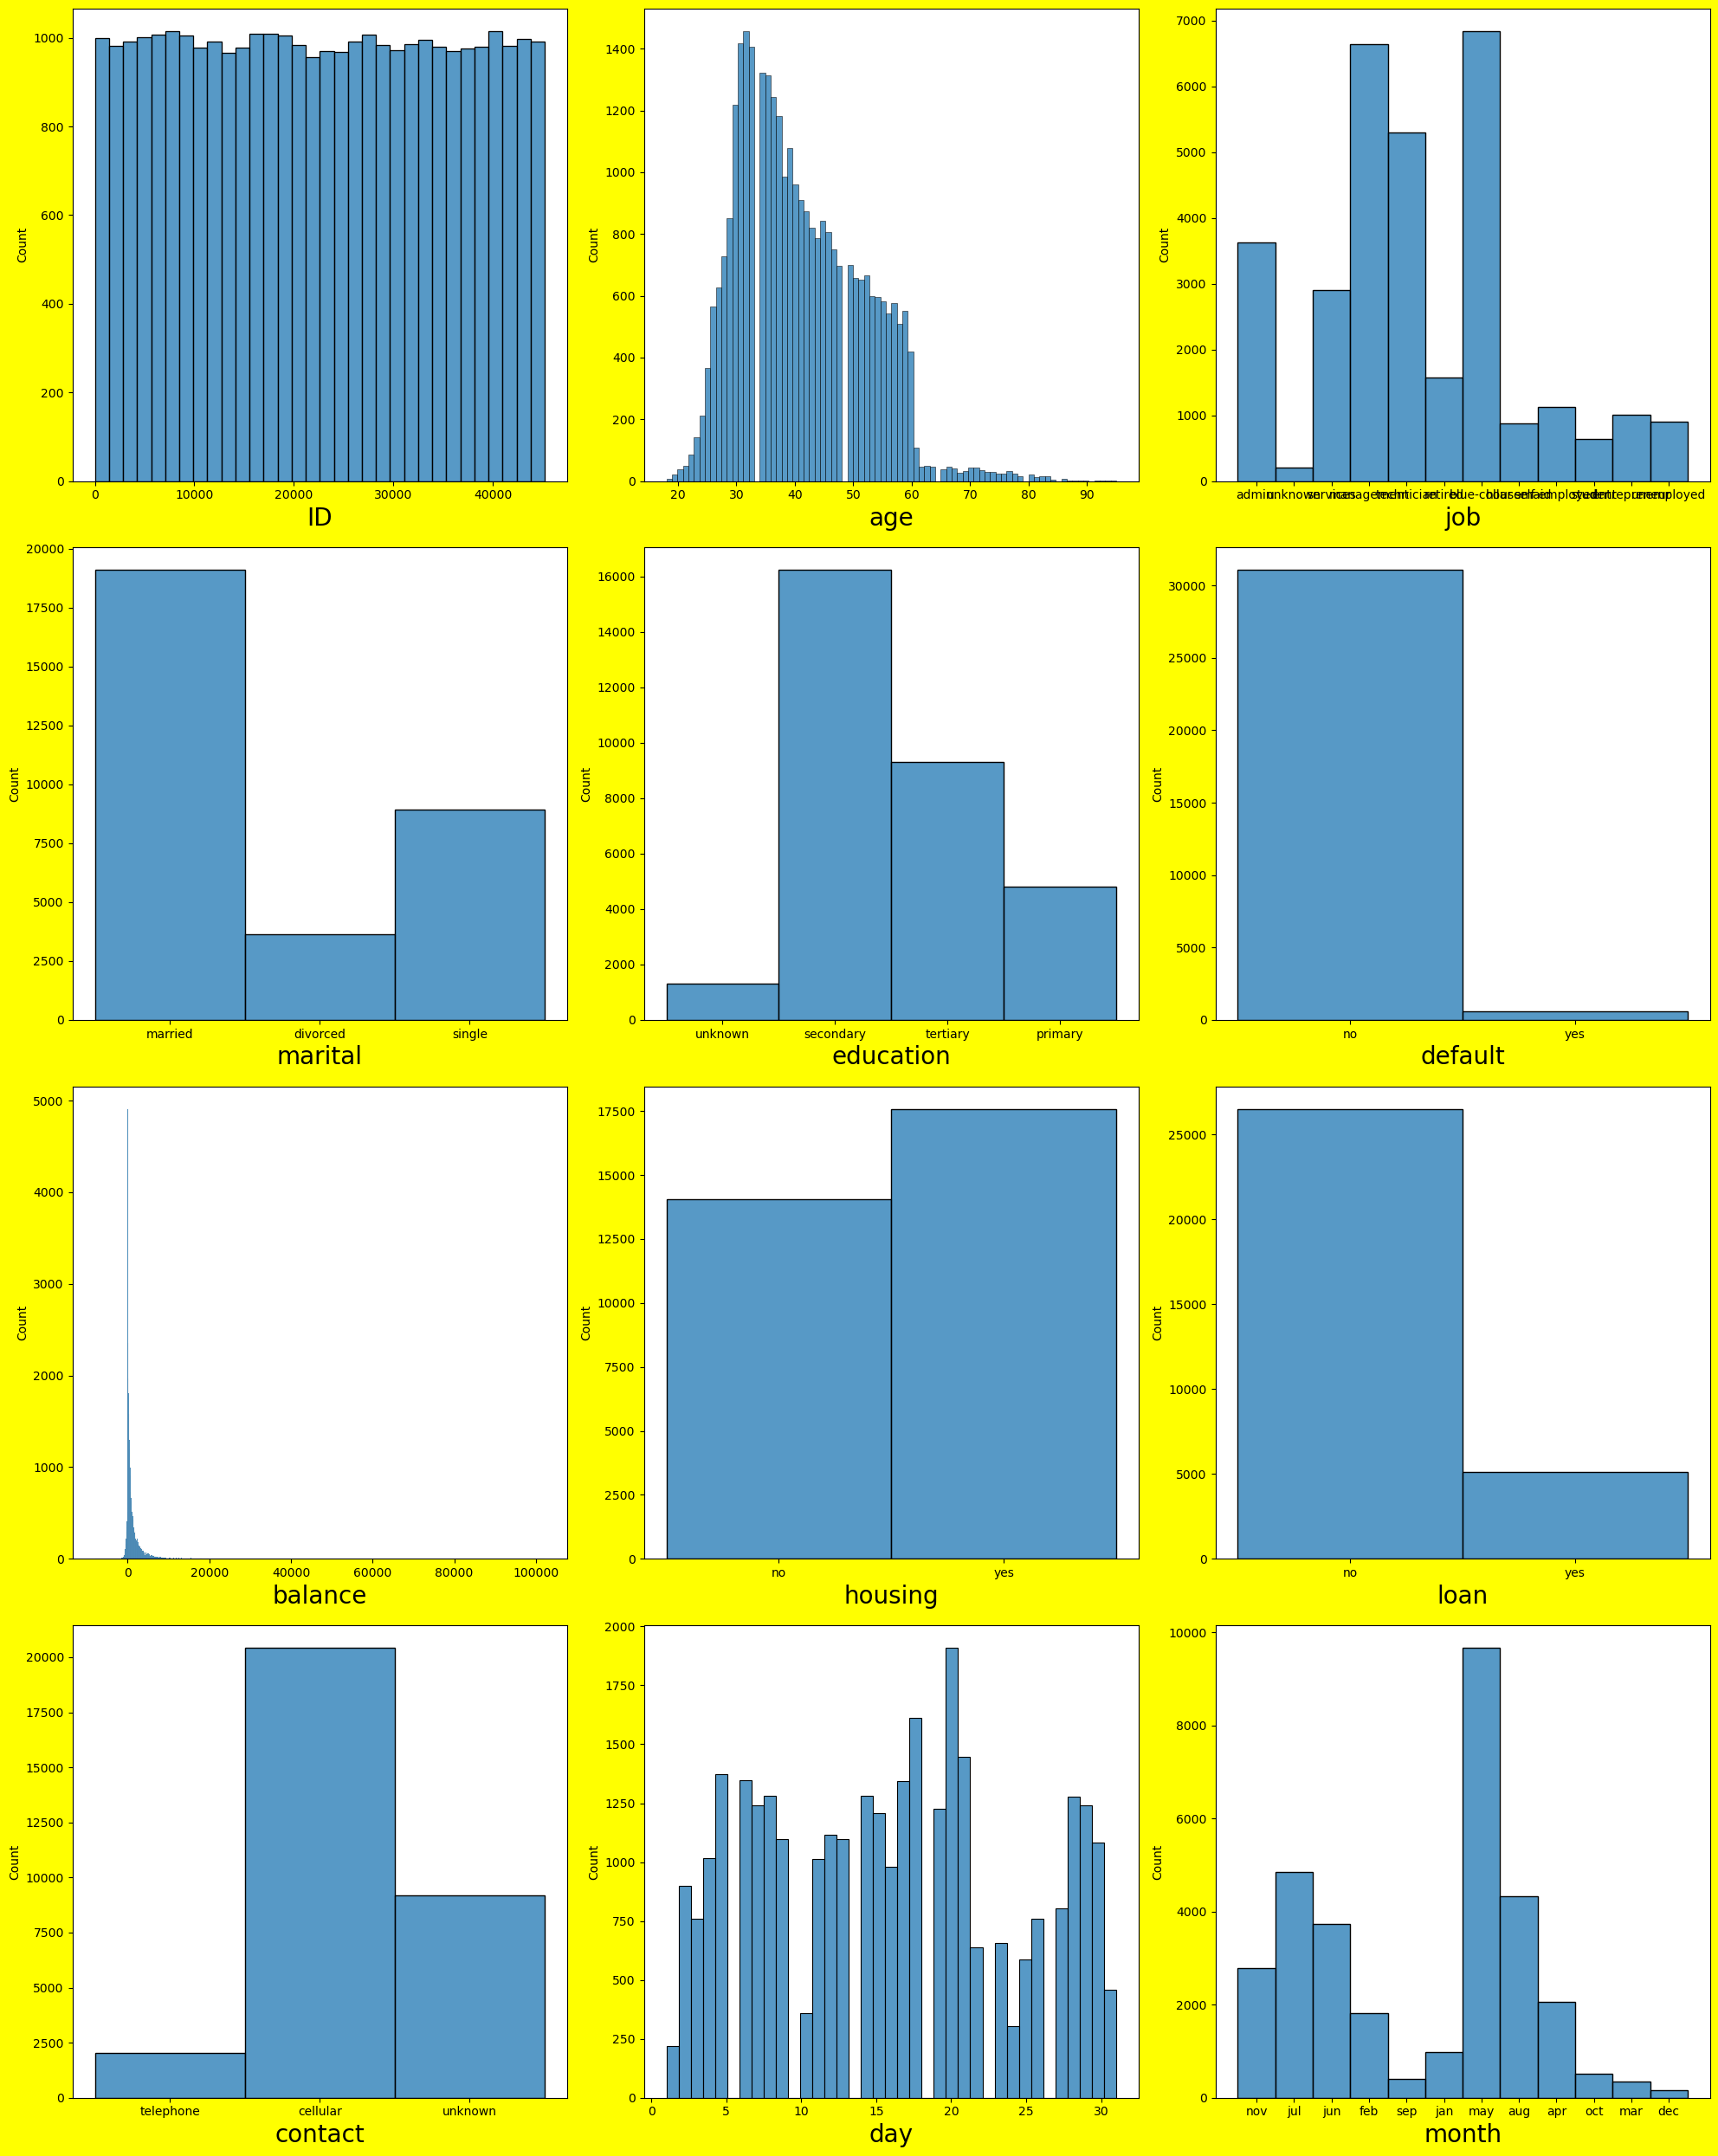

In [16]:
plt.figure(figsize=(20, 25), facecolor='yellow')

plotnumber = 1
for column in dftrain.columns:
    if plotnumber <= 12:
        plt.subplot(4, 3, plotnumber)
        sns.histplot(dftrain[column])
        plt.xlabel(column, fontsize=20)
        plotnumber += 1

plt.tight_layout()
plt.show()

In [17]:
# Define a function to handle outlier removal for multiple columns
def remove_outliers(dftrain, column):
    q1 = dftrain[column].quantile(0.25)
    q3 = dftrain[column].quantile(0.75)
    iqr = q3 - q1
    
    # Calculate lower and upper limits for outliers
    low_limit = q1 - 1.5 * iqr
    high_limit = q3 + 1.5 * iqr
    
    # Find indices of outliers
    index = np.where((dftrain[column] < low_limit) | (dftrain[column] > high_limit))
    
    # Drop rows with outliers
    dftrain = dftrain.drop(dftrain.index[index])
    
    return dftrain

# List of columns to handle outliers
columns_to_check = ['age','balance','duration','campaign','pdays','previous']  # Add more columns as needed

# Loop through each column and remove outliers
for col in columns_to_check:
    dftrain= remove_outliers(dftrain, col)

# Check the shape of the updated 'data' after removing outliers
data_shape = dftrain.shape

# Reset index of the 'data' dataframe
dftrain.reset_index(drop=True, inplace=True)


ID             Axes(0.125,0.653529;0.227941x0.226471)
age         Axes(0.398529,0.653529;0.227941x0.226471)
balance     Axes(0.672059,0.653529;0.227941x0.226471)
day            Axes(0.125,0.381765;0.227941x0.226471)
duration    Axes(0.398529,0.381765;0.227941x0.226471)
campaign    Axes(0.672059,0.381765;0.227941x0.226471)
pdays              Axes(0.125,0.11;0.227941x0.226471)
previous        Axes(0.398529,0.11;0.227941x0.226471)
dtype: object

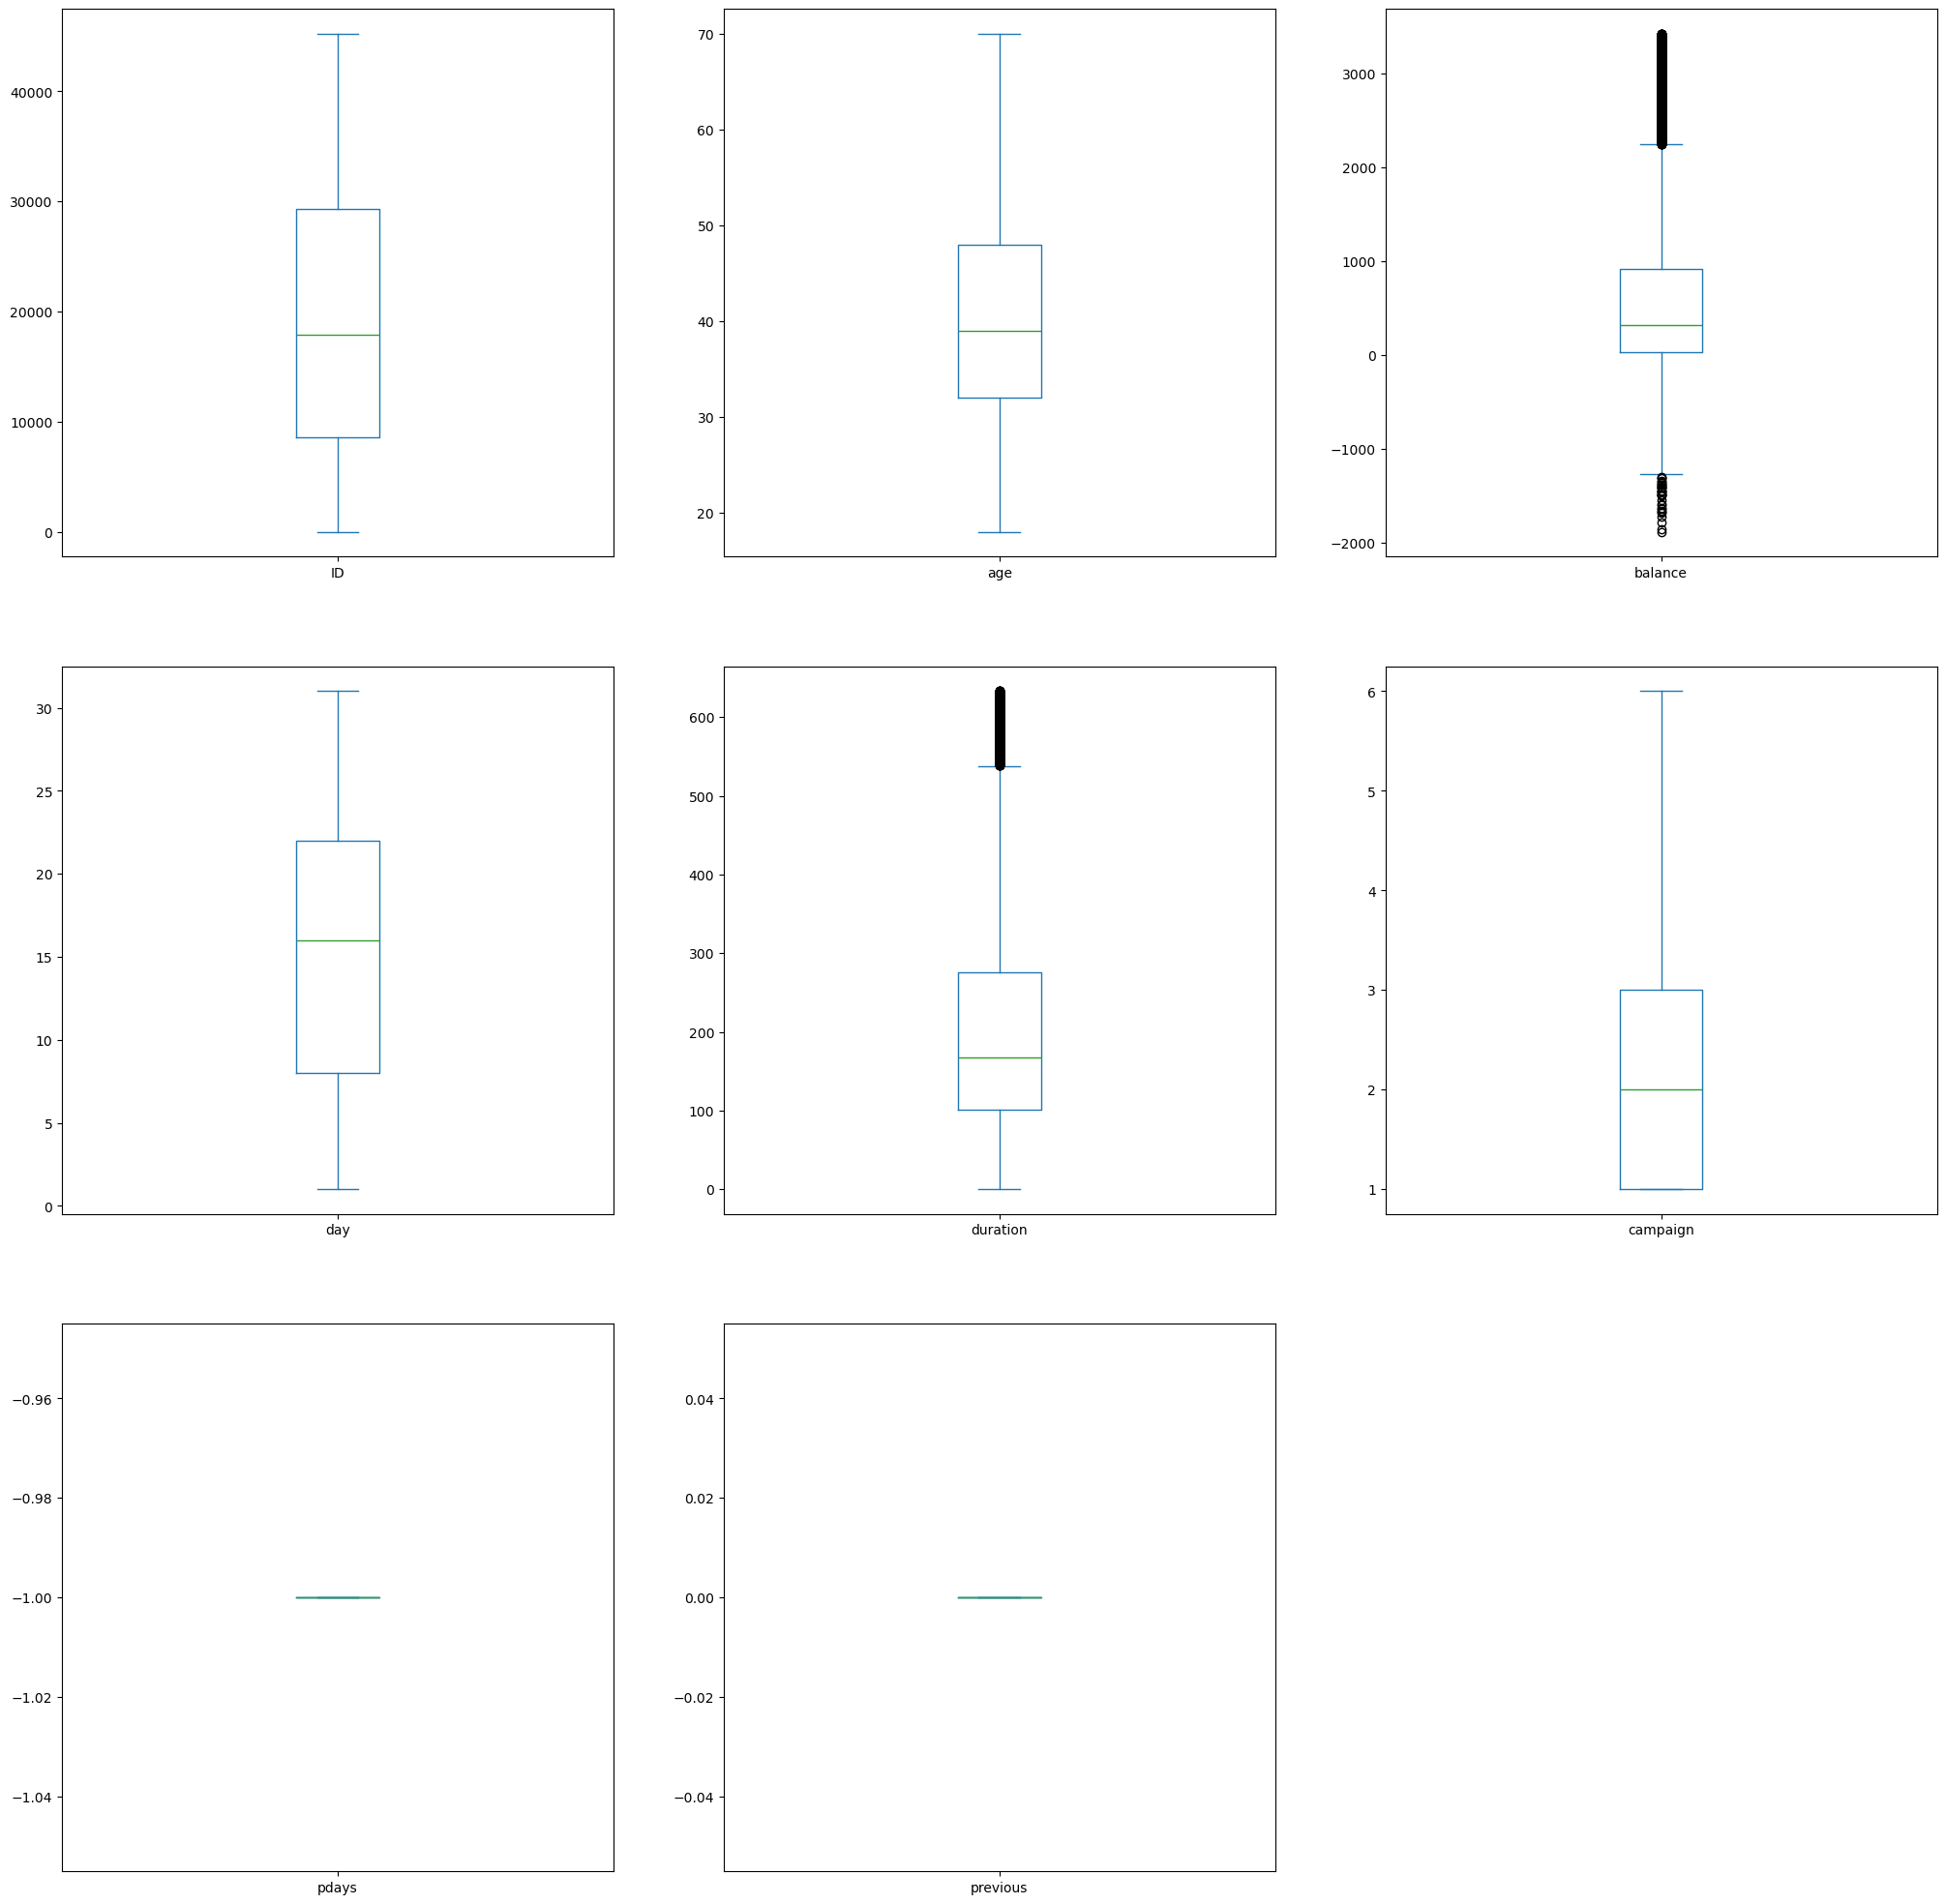

In [18]:
dftrain.plot(kind='box',subplots=True,layout=(3,3),figsize=(25,25),sharex=False)

In [19]:
dftrain.shape

(19720, 18)

In [20]:



# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate through columns and convert categorical features to numerical data
for col in dftrain.columns:
    if dftrain[col].dtype == 'object':
        dftrain[col] = label_encoder.fit_transform(dftrain[col])



# lets train and test the dataset

In [21]:
X=dftrain.drop(['subscribed'],axis=1)
y=dftrain['subscribed']
x=dftest

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [22]:
dftrain.sample(20)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
12439,24159,34,4,1,2,0,676,0,0,1,11,9,486,1,-1,0,0,1
17257,290,40,6,1,1,0,672,1,0,2,5,8,164,2,-1,0,0,0
3631,10292,53,5,1,1,0,340,1,0,2,12,6,138,1,-1,0,0,0
19062,7366,33,1,2,3,0,12,1,0,2,29,8,241,4,-1,0,0,0
9005,29178,40,7,1,1,0,683,1,0,0,2,3,299,2,-1,0,0,0
9641,24277,31,2,2,2,0,1454,0,0,0,17,9,377,1,-1,0,0,0
9538,23849,39,4,2,2,0,109,0,0,0,29,1,159,2,-1,0,0,0
2189,35397,35,1,2,1,0,2227,1,0,0,7,8,219,1,-1,0,0,0
16627,34745,54,4,1,0,1,0,1,1,0,6,8,95,1,-1,0,0,0
11774,22241,33,4,1,2,0,137,1,1,0,21,1,70,2,-1,0,0,0


# model selection

In [23]:
len(X_train)

15776

In [24]:
len(X_test)

3944

In [25]:
len(x)

13564

In [26]:
RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)

RandomForestClassifier()

In [27]:
# write one function and call as many as times to check accuracy_score of different models
def metric_score(clf,X_train,X_test,y_train,y_test,train=True):
    if train:
        y_pred=RFC.predict(X_train)
        print('\n==================train result=============')
        print(f'accuracy_score:{accuracy_score(y_train,y_pred)*100:.2f}%')
    elif train==False:
        pred=RFC.predict(X_test)
        print('\n=============test result=================')
        print(f'accuracy_score:{accuracy_score(y_test,pred)*100:.2f}%')
        print('\n test classification report\n ',classification_report(y_test,pred,digits=3)) #model confidence /accuracy


In [28]:
# call the function and pass dataset to check train and test score
metric_score(RFC,X_train,X_test,y_train,y_test,train=True) # this is for training score
metric_score(RFC,X_train,X_test,y_train,y_test,train=False) # this is for testing score


==================train result=============
accuracy_score:100.00%

=============test result=================
accuracy_score:95.31%

 test classification report
                precision    recall  f1-score   support

           0      0.963     0.988     0.975      3725
           1      0.642     0.352     0.454       219

    accuracy                          0.953      3944
   macro avg      0.802     0.670     0.715      3944
weighted avg      0.945     0.953     0.947      3944



# now train model in test data

In [29]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate through columns and convert categorical features to numerical data
for col in dftest.columns:
    if dftest[col].dtype == 'object':
        dftest[col] = label_encoder.fit_transform(dftest[col])

In [30]:
# write one function and call as many as times to check accuracy_score of different models
def metric_score(RFC,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=RFC.predict(X_train)
        print('\n============train result=============')
        print(f'accuracy_score:{accuracy_score(y_train,y_pred)*100:.2f}%')
    elif train==False:
        pred=RFC.predict(X_test)
        print('\n=============test result=============')
        print(f'accuracy_score:{accuracy_score(y_test,pred)*100:.2f}%')
        print('\n test classification report\n ',classification_report(y_test,pred,digits=3)) #model confidence /accuracy


In [31]:
# call the function and pass dataset to check train and test score
metric_score(RFC,X_train,X_test,y_train,y_test,train=True) # this is for training score
metric_score(RFC,X_train,X_test,y_train,y_test,train=False) # this is for testing score


============train result=============
accuracy_score:100.00%

=============test result=============
accuracy_score:95.31%

 test classification report
                precision    recall  f1-score   support

           0      0.963     0.988     0.975      3725
           1      0.642     0.352     0.454       219

    accuracy                          0.953      3944
   macro avg      0.802     0.670     0.715      3944
weighted avg      0.945     0.953     0.947      3944



In [32]:
# lets see how well our model performs on the test data set
y_pred=RFC.predict(dftest)
y_pred

array([0, 1, 0, ..., 0, 1, 0])

In [33]:
RFC.predict(dftest)

array([0, 1, 0, ..., 0, 1, 0])

In [34]:
# Add a new column
dftest['actually subscribed'] = y_pred


In [35]:
#result of test data actually subscribed
dftest

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,actually subscribed
0,38441,32,7,1,1,0,118,1,0,0,15,8,20,6,-1,0,3,0
1,40403,78,5,0,0,0,2787,0,0,1,1,5,372,1,-1,0,3,1
2,3709,31,6,2,2,0,144,1,0,2,16,8,676,1,-1,0,3,0
3,37422,57,7,2,0,0,3777,1,0,1,13,8,65,2,-1,0,3,0
4,12527,45,1,0,1,0,-705,0,1,2,3,5,111,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,4,1,2,0,45,0,0,0,28,1,148,4,-1,0,3,0
13560,11743,54,1,1,0,0,2281,1,0,2,20,6,158,1,-1,0,3,0
13561,28292,35,5,1,0,0,285,1,0,0,29,4,136,1,-1,0,3,0
13562,45163,29,0,2,1,0,464,0,0,0,9,9,208,2,91,3,2,1


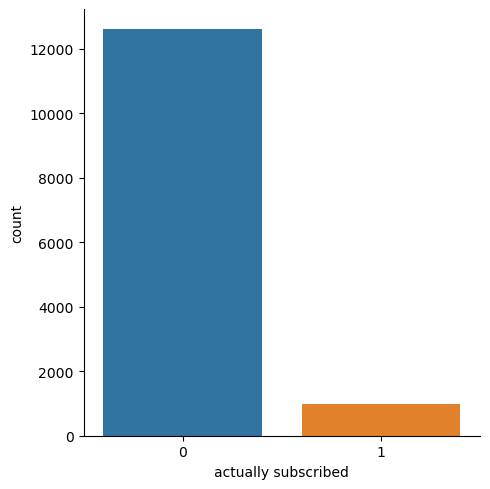

In [36]:
# number of values for each quality
sns.catplot(x='actually subscribed', data=dftest,kind='count')

# CONCLUSION

from the result we conclude that only nearly 1000 people has been subcribed and almost 13000 has not been subcribed